# Initial data exploration
---

[Memotion dataset 7k](https://www.kaggle.com/williamscott701/memotion-dataset-7k): Dataset for sentiment classification of memes

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle
from PIL import Image

## Load

In [2]:
print('Current directory:', os.getcwd())
print('Changing directory: moving up')
os.chdir('../')
print('Current directory:', os.getcwd())

Current directory: /Users/victor/Desktop/bert-for-memes/notebooks
Changing directory: moving up
Current directory: /Users/victor/Desktop/bert-for-memes


In [3]:
# Pickling
data_raw_path = "data/raw/"
with open(data_raw_path+"labels_pd_pickle","rb") as file_handle:
    labels_df = pickle.load(file_handle)
    
with open(data_raw_path+"reference_df_pickle","rb") as file_handle:
    reference_df = pickle.load(file_handle)

In [4]:
display(labels_df.head(3))
labels_df.shape

,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
0,image_1.jpg,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...,hilarious,general,not_offensive,not_motivational,very_positive
1,image_2.jpeg,The best of #10 YearChallenge! Completed in le...,The best of #10 YearChallenge! Completed in le...,not_funny,general,not_offensive,motivational,very_positive
2,image_3.JPG,Sam Thorne @Strippin ( Follow Follow Saw every...,Sam Thorne @Strippin ( Follow Follow Saw every...,very_funny,not_sarcastic,not_offensive,not_motivational,positive


(6992, 8)

In [5]:
display(reference_df.head(3))
reference_df.shape

,original_name,image_url,image_name
0,10_year_2r94rv.jpg,https://i.imgflip.com/2r94rv.jpg,image_1.jpg
1,10_year_10-year-challenge_1547788782.jpeg,https://spiderimg.amarujala.com/assets/images/...,image_2.jpeg
2,10_year_10yearchallenge-5c75f8b946e0fb0001edc7...,https://www.lifewire.com/thmb/8wNfd94_meE9X2cp...,image_3.JPG


(6992, 3)

## Images

In [15]:
def plot_image(image_name):
    image = Image.open(data_raw_path+"images/"+image_name)
    # summarize some details about the image
    print(image.format, image.size, image.mode)
    # show the image
    plt.imshow(image)
    plt.show()

JPEG (735, 500) RGB


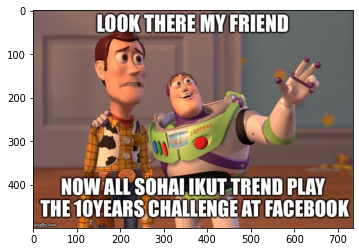

'LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIKUT TREND PLAY THE 10 YEARS CHALLENGE AT FACEBOOK imgflip.com'

In [18]:
plot_image(labels_df.image_name[0])
labels_df.text_corrected[0]

## Text and labels

### Labels distribution

In [7]:
labels_df.describe()

,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
count,6992,6831,6987,6992,6992,6992,6992,6992
unique,6992,6645,6939,4,4,4,2,5
top,image_1.jpg,"<html><head><meta content=""text/html; charset=...","<html><head><meta content=""text/html; charset=...",funny,general,not_offensive,not_motivational,positive
freq,1,104,5,2452,3507,2713,4525,3127


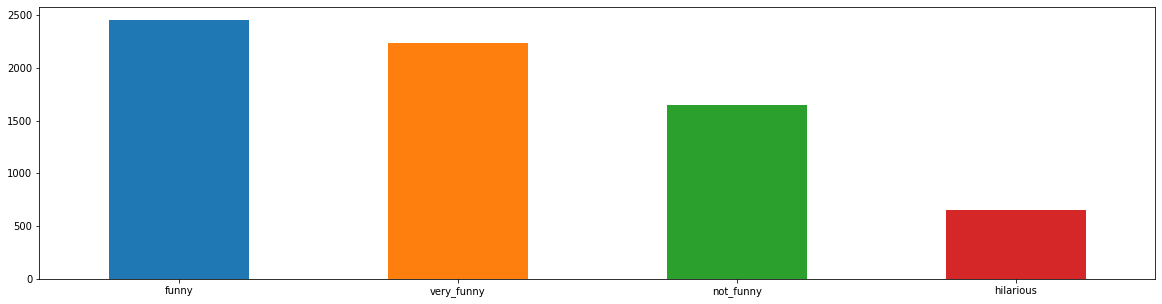

In [34]:
colors = ['C0', 'C1', 'C2', 'C3', 'C4']
_ = labels_df.humour.value_counts().plot(kind='bar', figsize=(20,5), rot=0, color=colors)

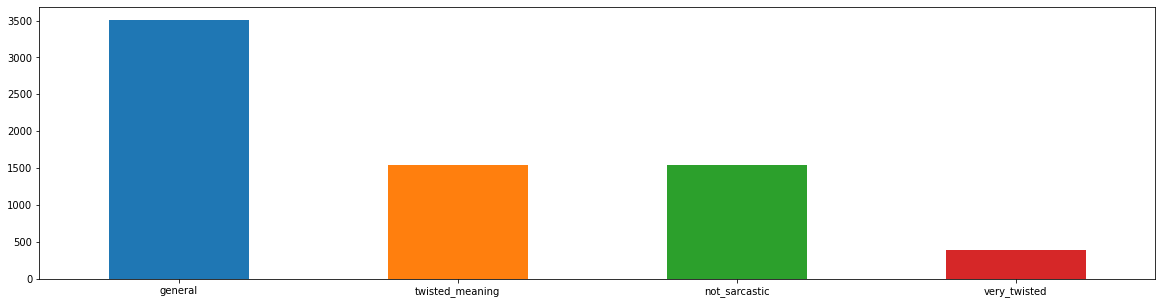

In [9]:
_ = labels_df.sarcasm.value_counts().plot(kind='bar', figsize=(20,5), rot=0, color=colors)

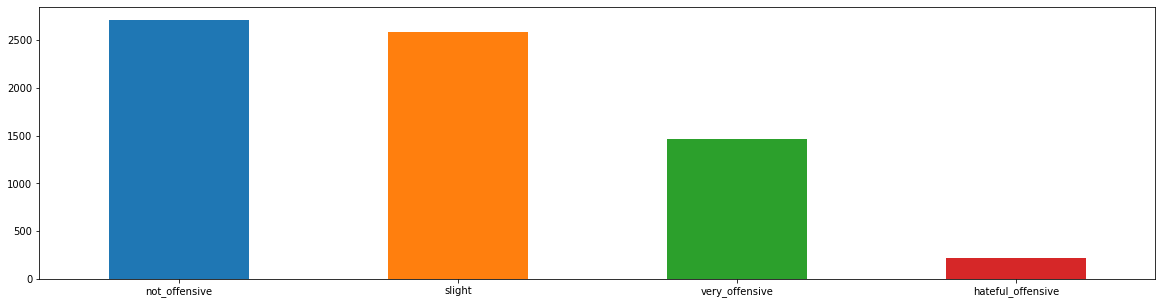

In [10]:
_ = labels_df.offensive.value_counts().plot(kind='bar', figsize=(20,5), rot=0, color=colors)

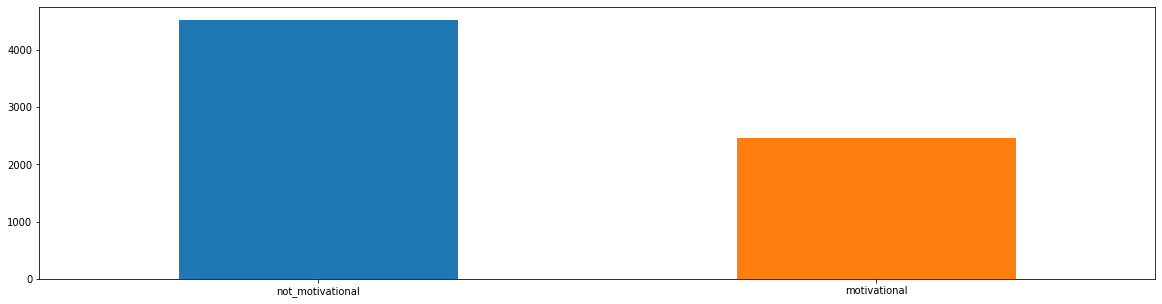

In [11]:
_ = labels_df.motivational.value_counts().plot(kind='bar', figsize=(20,5), rot=0, color=colors)

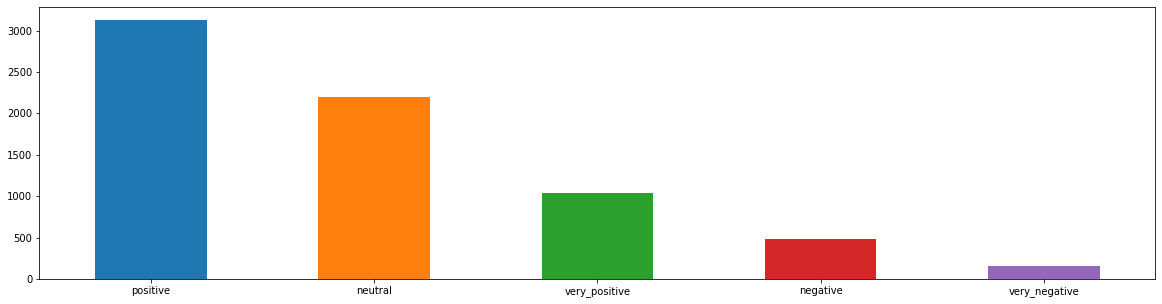

In [12]:
_ = labels_df.overall_sentiment.value_counts().plot(kind='bar', figsize=(20,5), rot=0, color=colors)

In [21]:
labels_df.text_corrected

0       LOOK THERE MY FRIEND LIGHTYEAR NOW ALL SOHALIK...
1       The best of #10 YearChallenge! Completed in le...
2       Sam Thorne @Strippin ( Follow Follow Saw every...
3                   10 Year Challenge - Sweet Dee Edition
4       10 YEAR CHALLENGE WITH NO FILTER 47 Hilarious ...
                              ...                        
6987    Tuesday is Mardi Gras Wednesday is Valentine's...
6988    MUST WATCH MOVIES OF 2017 ITI Chennai memes MA...
6989    LESS MORE TALKING PLANNING SODA JUNK FOOD COMP...
6990    When I have time is a fantasy. no one has time...
6991    The starting point for every good idea is "Wha...
Name: text_corrected, Length: 6992, dtype: object

### Missing values

In [45]:
labels_df.isna().sum()

image_name             0
text_ocr             161
text_corrected         5
humour                 0
sarcasm                0
offensive              0
motivational           0
overall_sentiment      0
dtype: int64

In [48]:
labels_na = labels_df[labels_df.isna().any(axis=1)]
pd.set_option('display.max_rows', labels_na.shape[0]+1)
labels_na

,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
40,image_41.PNG,NaN,Me: Has seen every Marvel movie before Endgame:,very_funny,twisted_meaning,slight,motivational,positive
83,image_84.png,NaN,X-MEN VS AVENGERS MOVIE? AvengersMeme RUSH .....,very_funny,general,not_offensive,not_motivational,very_positive
114,image_115.jpg,NaN,One Does Not Simply Into Mordor Challenge Acce...,very_funny,general,not_offensive,not_motivational,very_positive
119,image_120.jpg,CHALLENGE ACCEPTED! Friend: You can't honestly...,NaN,not_funny,general,not_offensive,not_motivational,positive
283,image_284.PNG,NaN,Mike Tyson bought a new computer. It has two b...,funny,not_sarcastic,not_offensive,not_motivational,positive
298,image_299.jpg,NaN,OKAY,not_funny,twisted_meaning,not_offensive,not_motivational,neutral
354,image_355.jpg,NaN,THE METAL IS STRONG WITH THIS ONE memegenerato...,very_funny,general,very_offensive,not_motivational,negative
524,image_525.jpg,NaN,Monday ? BRING IT ON!,funny,general,slight,not_motivational,very_positive
658,image_659.jpg,NaN,NO.,very_funny,general,slight,motivational,positive
757,image_758.PNG,NaN,Chuck Norris hot 11out of 10 targets Memedroid...,funny,general,slight,motivational,very_positive


In [49]:
labels_na = labels_df[labels_df.text_corrected.isna()]
pd.set_option('display.max_rows', labels_na.shape[0]+1)
labels_na

,image_name,text_ocr,text_corrected,humour,sarcasm,offensive,motivational,overall_sentiment
119,image_120.jpg,CHALLENGE ACCEPTED! Friend: You can't honestly...,NaN,not_funny,general,not_offensive,not_motivational,positive
4799,image_4800.jpg,NaN,NaN,very_funny,general,slight,motivational,neutral
6781,image_6782.jpg,NaN,NaN,very_funny,twisted_meaning,not_offensive,not_motivational,positive
6784,image_6785.jpg,NaN,NaN,hilarious,general,not_offensive,not_motivational,positive
6786,image_6787.jpg,NaN,NaN,not_funny,not_sarcastic,very_offensive,motivational,positive


119
JPEG (500, 480) RGB


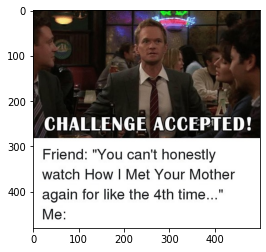

4799
JPEG (612, 816) RGB


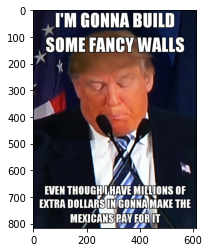

6781
JPEG (614, 432) RGB


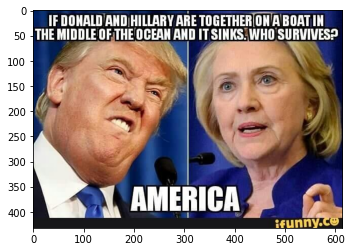

6784
JPEG (698, 491) RGB


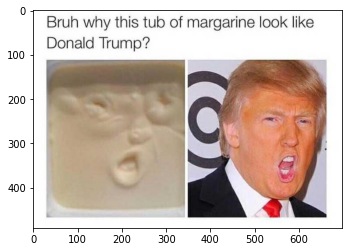

6786
JPEG (944, 473) RGB


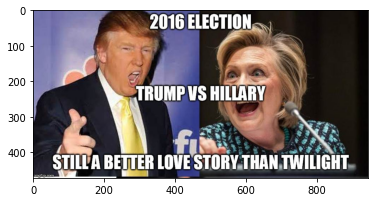

In [56]:
# Explore the 5 images with NaN text_corrected 
for i, row in labels_na.iterrows():
    print(i)
    plot_image(row.image_name)